# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

**Goal**

The goal of this project is to figure out which factors have the biggest impact on the price of used cars. To do this, we'll take a dataset that includes details like the car's manufacturer, model, age, mileage, and other features, and analyze how these variables are related to price. By using regression models and machine learning techniques, we’ll be able to measure the importance of each factor and predict car prices more accurately. The process involves cleaning and preparing the data, creating new features if needed, building and testing models, and evaluating how well they perform. This analysis will help us provide insights that used car dealerships can use to improve their pricing strategies.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Omit this code and change the file_path below if your data is not on google drive.

In [26]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
from sklearn.metrics import roc_curve
from sklearn.model_selection import learning_curve
import missingno as msno
import warnings

warnings.filterwarnings("ignore")

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning) # Code that generates FutureWarning

Loading all needed libraries and supress warnings.

In [27]:
# Load dataset
file_path = '/content/drive/MyDrive/vehicles.csv'  # Update the path to your dataset location
data = pd.read_csv(file_path)

Loading our data that we will review.

In [28]:
# Preview our data to orient ourselvs
data.head()

# Display what type of data is in the dataframe.
data.info()

#Randomly display more data to see what we have to work with:
np.random.seed(1)
display(data.sample(n=10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
154871,7308389161,south bend / michiana,7500,2012.0,mazda,3,excellent,NaN,gas,75011.0,rebuilt,automatic,NaN,fwd,compact,hatchback,silver,in
406469,7311927750,olympic peninsula,25999,2019.0,dodge,charger,NaN,6 cylinders,gas,45930.0,clean,automatic,2C3CDXBG1KH657722,rwd,NaN,sedan,custom,wa
252241,7305320997,central NJ,22645,2014.0,bmw,428 i,NaN,NaN,gas,77514.0,clean,automatic,WBA3V5C58EP747991,NaN,NaN,other,black,nj
29757,7303142676,imperial county,0,2015.0,chevrolet,silverado 1500,NaN,8 cylinders,gas,93775.0,clean,automatic,1GCVKREC7FZ420429,4wd,NaN,truck,NaN,ca
47657,7306374379,redding,21997,2007.0,toyota,4runner sport edition 4dr suv 1-oregon owner*r...,NaN,6 cylinders,gas,171525.0,clean,automatic,JTEBU14RX78083407,4wd,NaN,SUV,white,ca
4237,7307168620,mobile,26690,2016.0,toyota,tacoma,NaN,6 cylinders,gas,142702.0,clean,automatic,NaN,4wd,compact,pickup,silver,al
287384,7309828085,akron / canton,26990,2014.0,lexus,ls 460 sedan 4d,good,NaN,other,80984.0,clean,automatic,JTHBL5EF7E5132840,rwd,NaN,sedan,red,oh
365705,7312138406,austin,21500,2014.0,gmc,sierra 1500,like new,8 cylinders,gas,145000.0,clean,automatic,NaN,rwd,full-size,truck,black,tx
298255,7315302030,dayton / springfield,27590,2020.0,volkswagen,golf gti s hatchback,good,NaN,gas,1309.0,clean,other,3VW6T7AU5LM008606,fwd,NaN,sedan,red,oh
204043,7303236680,jackson,29995,2015.0,honda,odyssey ex-l,NaN,NaN,gas,22082.0,clean,automatic,5FNRL5H61FB088863,NaN,NaN,NaN,NaN,mi


Taking a peek at what data is present.

In [29]:
# Display null values as a percentage
data.isna().sum()/data.shape[0]*100

,0
id,0.000000
region,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
condition,40.785232
cylinders,41.622470
fuel,0.705819
odometer,1.030735


There is clearly data missing but viewing as a percentage is still hard to comprehend.

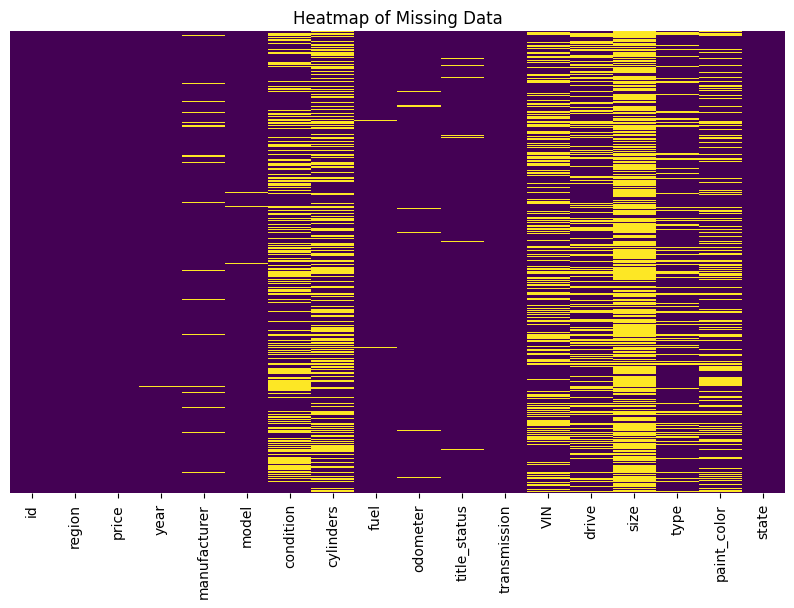

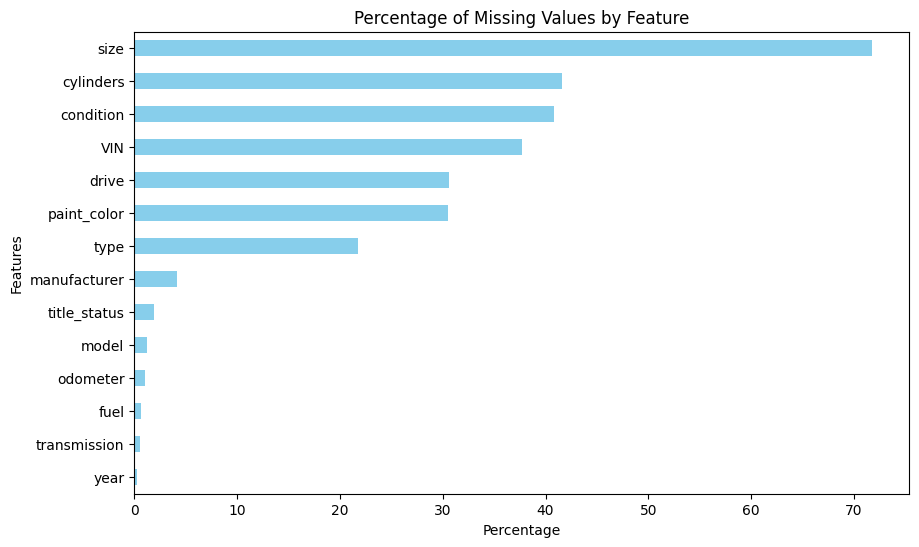

In [30]:
# Visualize Missing Data
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Data")
plt.show()

missing_percentage = data.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage.sort_values(inplace=True)

plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='barh', color='skyblue')
plt.title("Percentage of Missing Values by Feature")
plt.xlabel("Percentage")
plt.ylabel("Features")
plt.show()

The graphs make it easier to see how much and where data is missing. We will have to clean this up later.

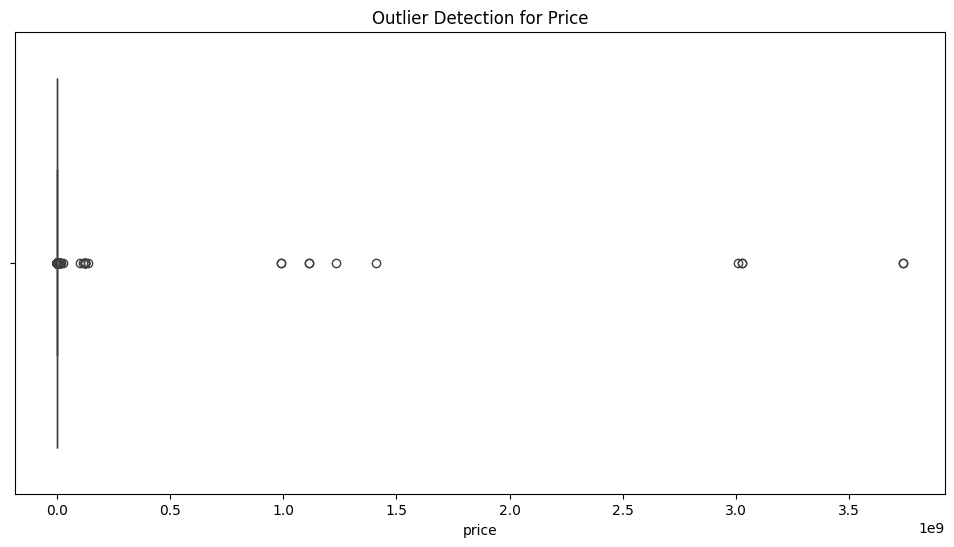

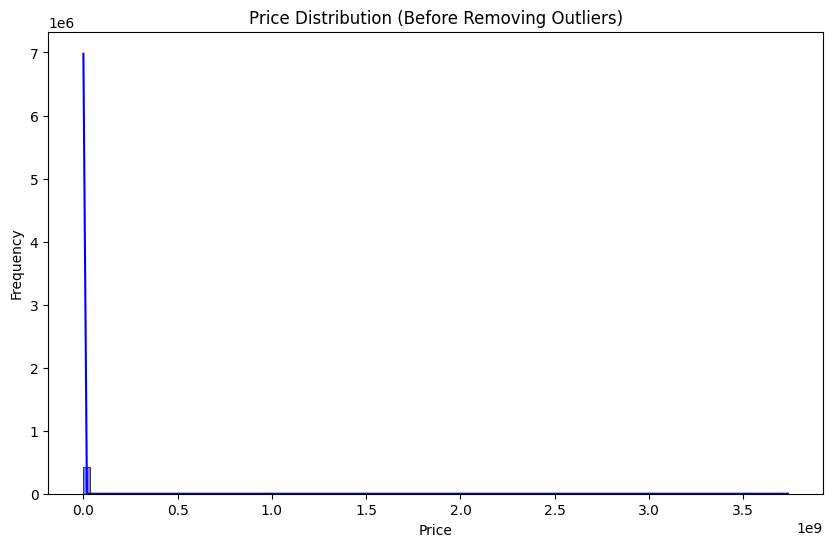

In [31]:
# Show the distrubtion of missing data by feature
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['price'])
plt.title("Outlier Detection for Price")
plt.show()

# Visualize price distribution before removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=100, kde=True, color='blue')
plt.title("Price Distribution (Before Removing Outliers)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In adidtion to missing data, there are outliers that need to be addressed in data clean.

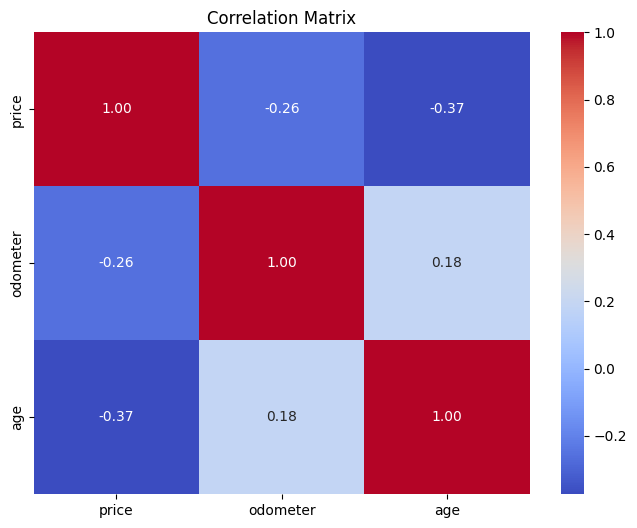

In [32]:
# Correlation Matrix Visualization
numerical_features = ['price', 'odometer', 'age']
correlation_matrix = data_sampled[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Adding a correlation matrix to understand how the features correlate to each other.

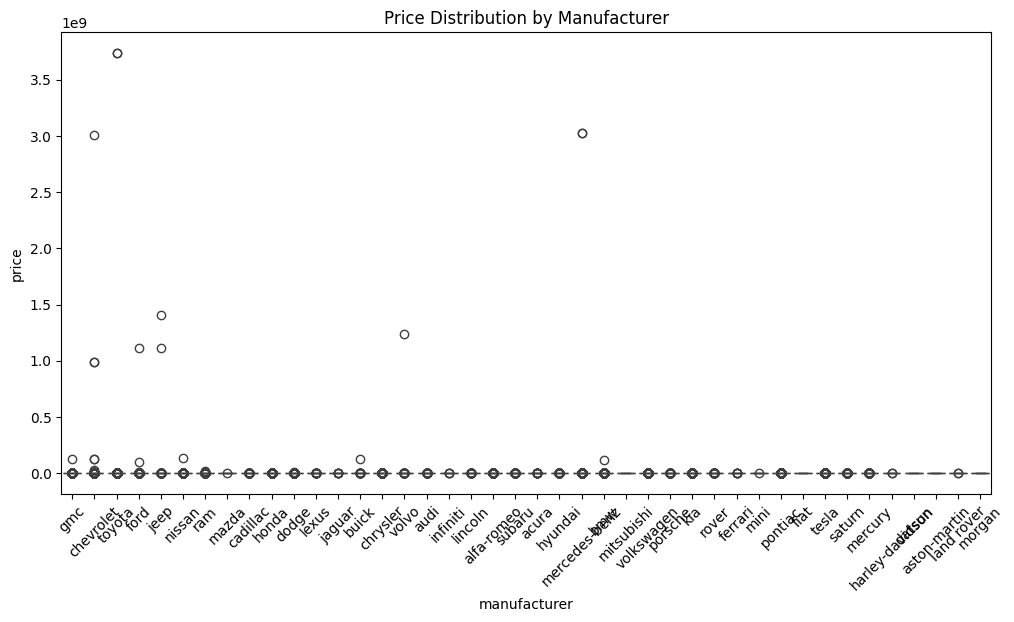

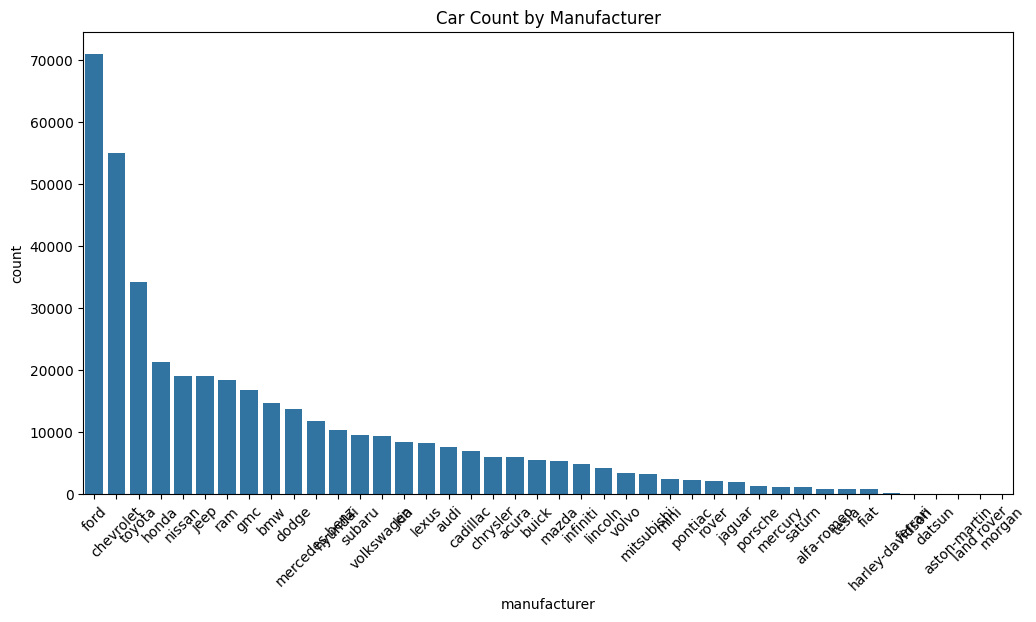

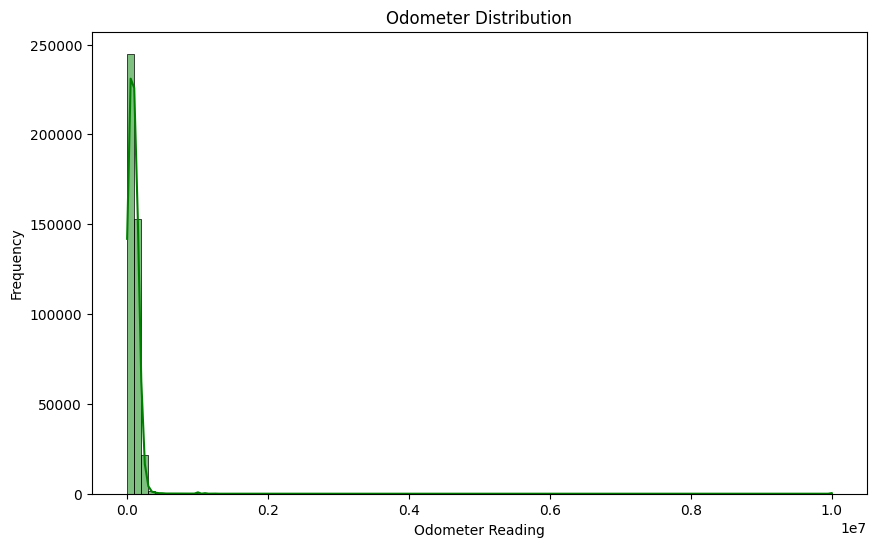

In [33]:
# Rough understanding of price distribution by manufacturer
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='price', data=data)
plt.xticks(rotation=45)
plt.title("Price Distribution by Manufacturer")
plt.show()

# Make sure the data is not skewed to one manufacturer
plt.figure(figsize=(12, 6))
sns.countplot(x='manufacturer', data=data, order=data['manufacturer'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Car Count by Manufacturer")
plt.show()


# Does milage have a big impact on price?
plt.figure(figsize=(10, 6))
sns.histplot(data['odometer'], bins=100, kde=True, color='green')
plt.title("Odometer Distribution")
plt.xlabel("Odometer Reading")
plt.ylabel("Frequency")
plt.show()


The graphs give us a quick understanding of what data is there now and how price may correlate.

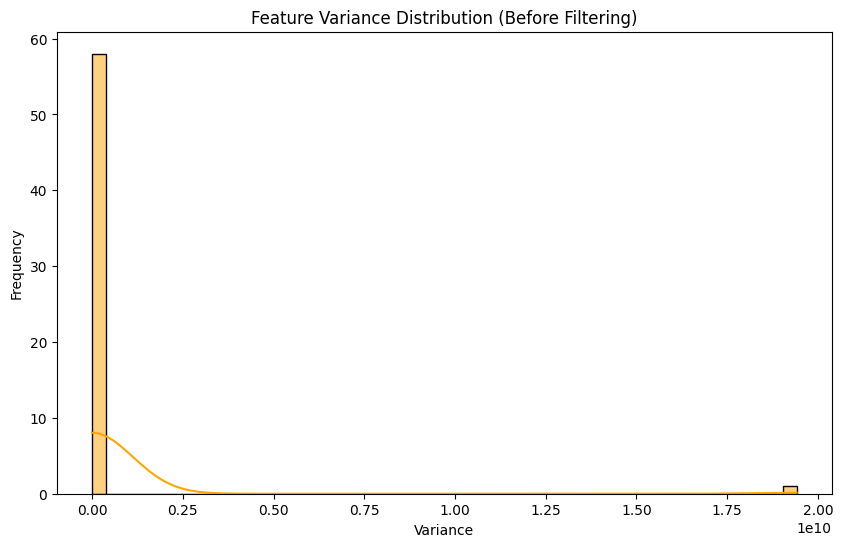

In [34]:
# Variance Filtering Visualization (Before)
plt.figure(figsize=(10, 6))
variances = np.var(X_combined, axis=0)
sns.histplot(variances, bins=50, kde=True, color='orange')
plt.title("Feature Variance Distribution (Before Filtering)")
plt.xlabel("Variance")
plt.ylabel("Frequency")
plt.show()

There is data with minimial varriance that may make data processing faster if we remove.  This should have little impact to the quality of our analysis.

In [35]:
# Make it easy to see what car attributes we have available to us in the dataset.
variable_list = data.columns.tolist()
print(variable_list)


['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']


Listing out the features of cars for easier reference.

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

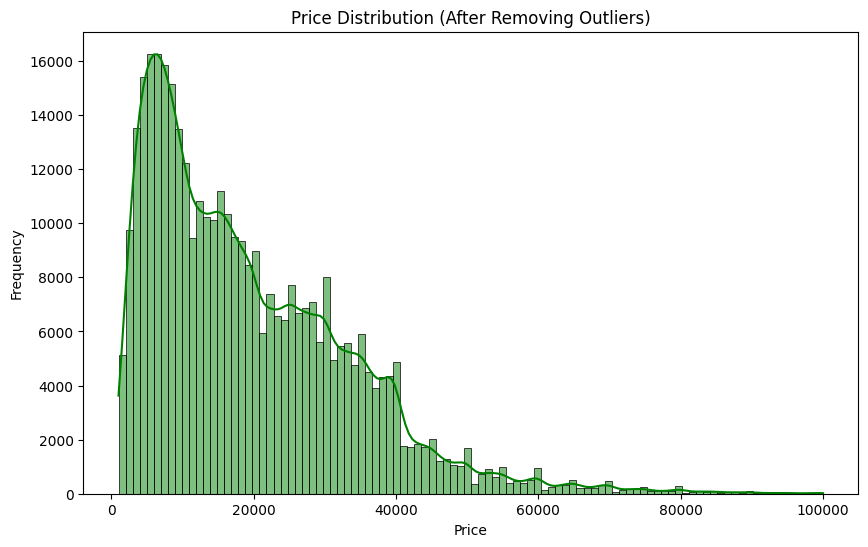

In [36]:
# Clean Data: Remove rows with missing critical values and outliers
data_cleaned = data.dropna(subset=['price', 'year', 'odometer']).copy()
data_cleaned = data_cleaned[(data_cleaned['price'] > 1000) & (data_cleaned['price'] < 100000)].copy()
data_cleaned = data_cleaned[(data_cleaned['year'] > 1900) & (data_cleaned['year'] <= 2024)].copy()

# Visualize price distribution after removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['price'], bins=100, kde=True, color='green')
plt.title("Price Distribution (After Removing Outliers)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

Lets remove outliers and display price after removal.

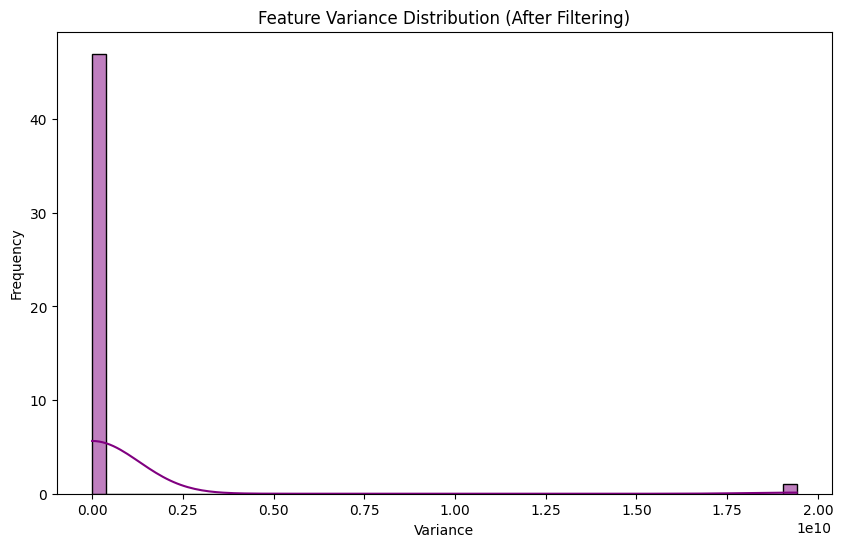

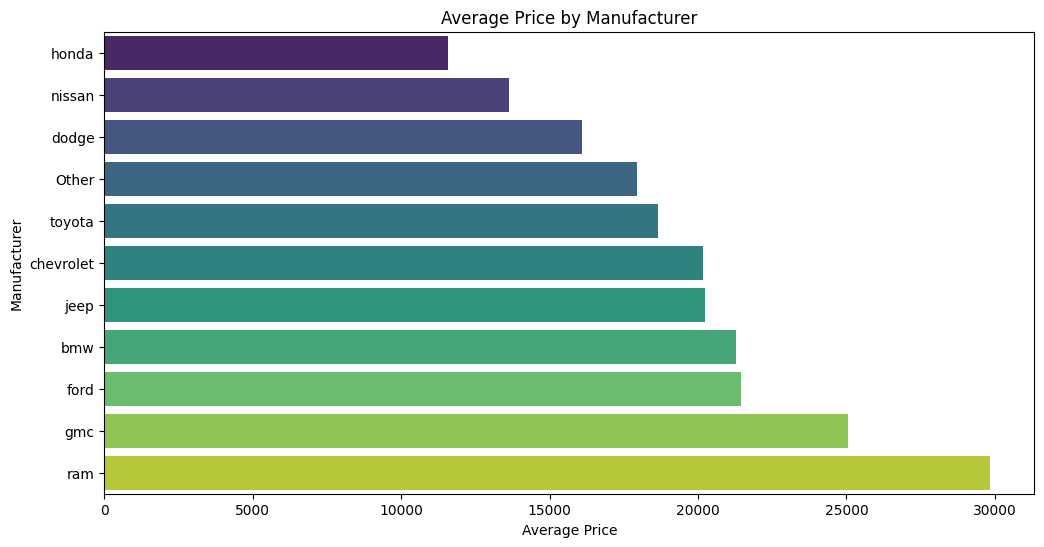

In [37]:
# Create 'age' feature
data_cleaned['age'] = 2024 - data_cleaned['year']

# Sampling smaller subset
data_sampled = data_cleaned.sample(n=10000, random_state=42)


# Limiting categories for One-Hot Encoding
categorical_columns = ['manufacturer', 'model', 'condition', 'fuel', 'transmission', 'drive', 'type', 'paint_color']
top_n = 10
for col in categorical_columns:
    top_categories = data_sampled[col].value_counts().index[:top_n]
    data_sampled[col] = data_sampled[col].where(data_sampled[col].isin(top_categories), 'Other')

# Features for encoding (categorical only)
features_for_encoding = categorical_columns

# OneHotEncoding with sparse_output
encoder = OneHotEncoder(drop='first', sparse_output=True, handle_unknown='ignore')
X_encoded_sparse = encoder.fit_transform(data_sampled[features_for_encoding])

# Combine numerical features (age, odometer) with encoded features
X_numerical = data_sampled[['age', 'odometer']].values
X_combined = np.hstack([X_encoded_sparse.toarray(), X_numerical])
y = data_sampled['price']


# Variance Filtering
selector = VarianceThreshold(threshold=0.01)
X_filtered_sparse = selector.fit_transform(X_combined)

# Variance Filtering Visualization (After)
plt.figure(figsize=(10, 6))
filtered_variances = np.var(X_filtered_sparse, axis=0)
sns.histplot(filtered_variances, bins=50, kde=True, color='purple')
plt.title("Feature Variance Distribution (After Filtering)")
plt.xlabel("Variance")
plt.ylabel("Frequency")
plt.show()


# Correctly map feature names after variance filtering
encoded_feature_names = encoder.get_feature_names_out(features_for_encoding)
all_feature_names = list(encoded_feature_names) + ['age', 'odometer']
selected_features = selector.get_support(indices=True)
final_feature_names = [all_feature_names[i] for i in selected_features]

# Ensure feature names match filtered features
if len(final_feature_names) != X_filtered_sparse.shape[1]:
    raise ValueError(f"Mismatch: {len(final_feature_names)} feature names but {X_filtered_sparse.shape[1]} filtered features.")

# Manufacturer vs Price Visualization
plt.figure(figsize=(12, 6))
manufacturer_avg_price = data_sampled.groupby('manufacturer')['price'].mean().sort_values()
#sns.barplot(x=manufacturer_avg_price.values, y=manufacturer_avg_price.index, palette='viridis')
sns.barplot(x=manufacturer_avg_price.values, y=manufacturer_avg_price.index, hue=manufacturer_avg_price.index, palette='viridis', dodge=False, legend=False)

plt.title("Average Price by Manufacturer")
plt.xlabel("Average Price")
plt.ylabel("Manufacturer")
plt.show()

The data is cleaned up for our analysis.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

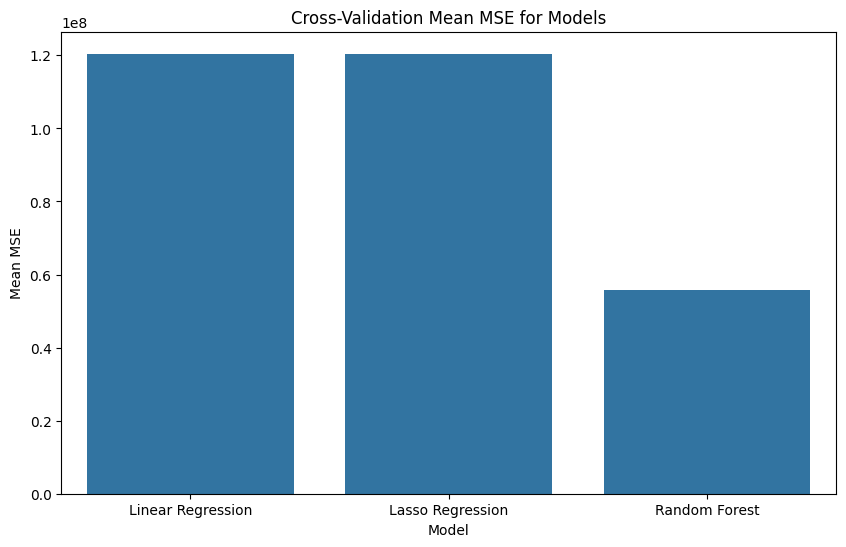

In [38]:
# Define Cross-Validation Strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define Models
lr_model = LinearRegression()
lasso_model = Lasso(random_state=42)
rf_model = RandomForestRegressor(random_state=42)

# Grid Search for Lasso Regression
lasso_param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}
lasso_grid = GridSearchCV(lasso_model, param_grid=lasso_param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid.fit(X_filtered_sparse, y)
best_lasso = lasso_grid.best_estimator_

# Grid Search for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(rf_model, param_grid=rf_param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_filtered_sparse, y)
best_rf = rf_grid.best_estimator_

# Cross-Validation for Linear Regression
cv_scores_lr = cross_val_score(lr_model, X_filtered_sparse, y, cv=kf, scoring='neg_mean_squared_error')
mean_cv_mse_lr = -cv_scores_lr.mean()

# Cross-Validation for Lasso Regression
cv_scores_lasso = cross_val_score(best_lasso, X_filtered_sparse, y, cv=kf, scoring='neg_mean_squared_error')
mean_cv_mse_lasso = -cv_scores_lasso.mean()

# Cross-Validation for Random Forest
cv_scores_rf = cross_val_score(best_rf, X_filtered_sparse, y, cv=kf, scoring='neg_mean_squared_error')
mean_cv_mse_rf = -cv_scores_rf.mean()

# Visualization of Cross-Validation Mean MSE
cv_mse_scores = {
    'Linear Regression': mean_cv_mse_lr,
    'Lasso Regression': mean_cv_mse_lasso,
    'Random Forest': mean_cv_mse_rf
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(cv_mse_scores.keys()), y=list(cv_mse_scores.values()))
plt.title("Cross-Validation Mean MSE for Models")
plt.ylabel("Mean MSE")
plt.xlabel("Model")
plt.show()


# Train-Test Split (for Visualizations)
X_train, X_test, y_train, y_test = train_test_split(X_filtered_sparse, y, test_size=0.3, random_state=42)

# Train Models for Visualizations
lr_model.fit(X_train, y_train)
best_lasso.fit(X_train, y_train)
best_rf.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_lasso = best_lasso.predict(X_test)
y_pred_rf = best_rf.predict(X_test)


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

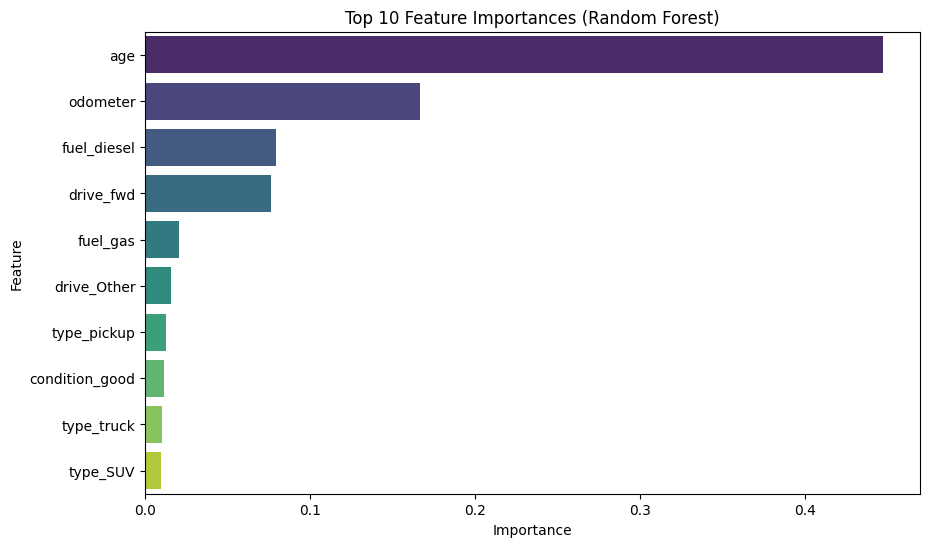

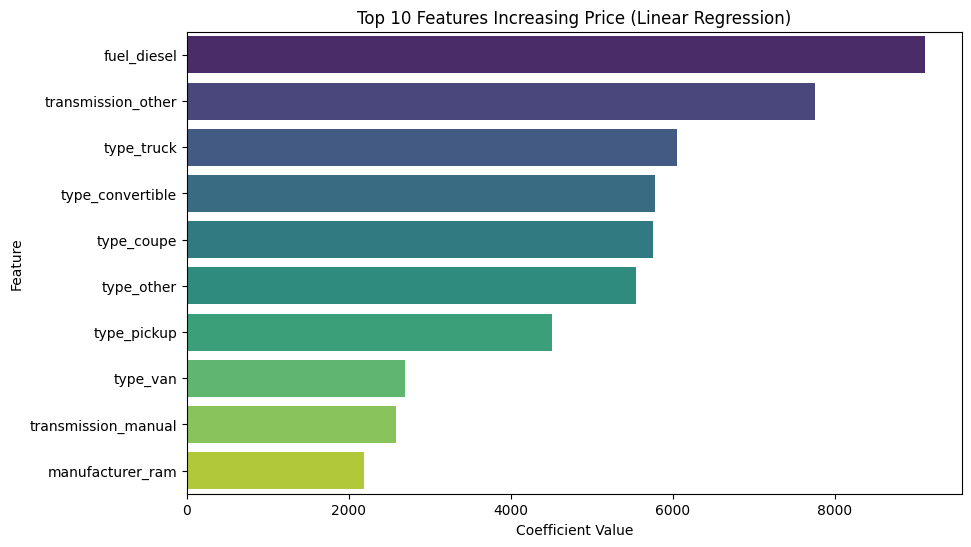

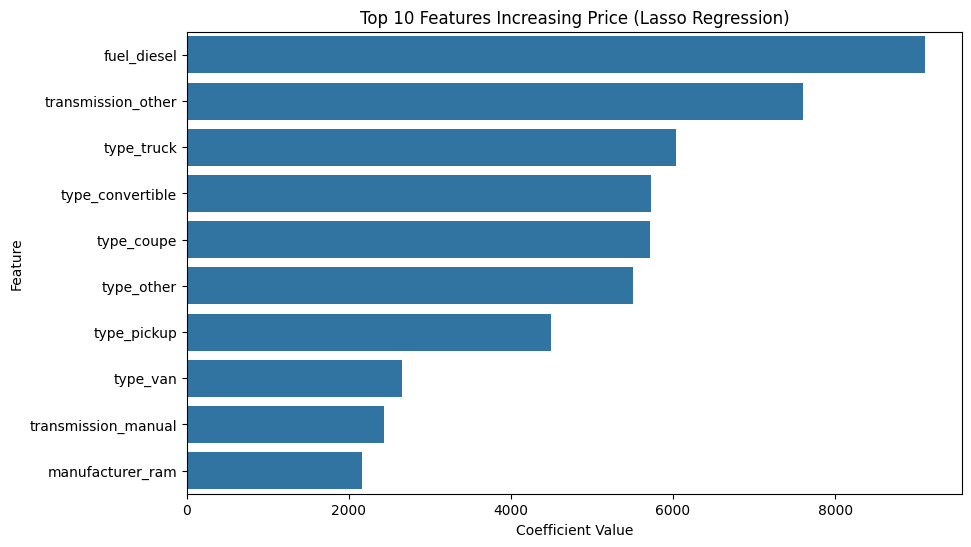

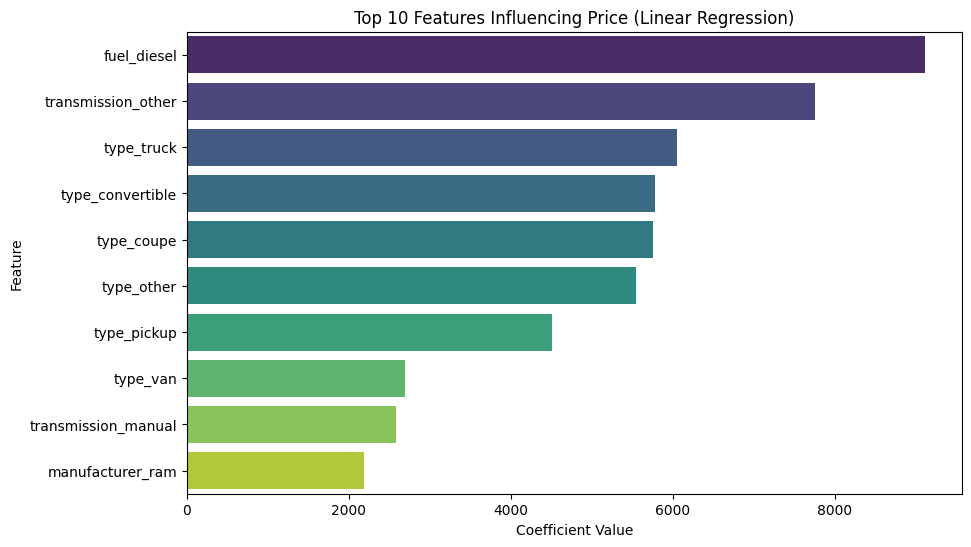

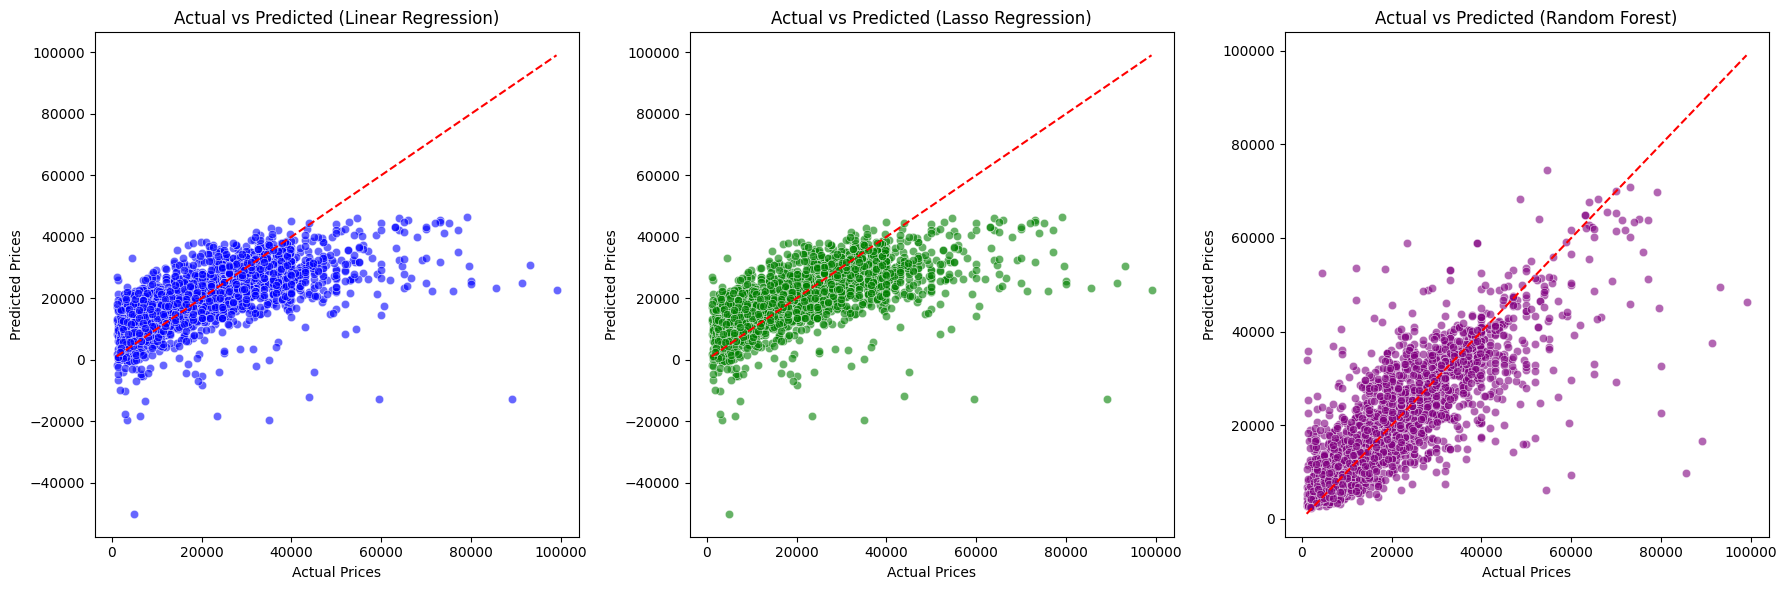

Interpretation of Linear Regression Coefficients:
A positive coefficient indicates an increase in price with an increase in the feature.
A negative coefficient indicates a decrease in price with an increase in the feature.

Top 5 Features Influencing Price (Linear Regression):
               Feature  Coefficient
17         fuel_diesel  9114.938709
23  transmission_other  7752.059687
34          type_truck  6048.728380
28    type_convertible  5779.907027
29          type_coupe  5752.813731

Interpretation of Lasso Regression Coefficients:
Lasso performs feature selection, so some coefficients may be zero.
Non-zero coefficients indicate features that influence price.

Top 5 Features Influencing Price (Lasso Regression):
               Feature  Coefficient
17         fuel_diesel  9109.997343
23  transmission_other  7601.820885
34          type_truck  6031.212157
28    type_convertible  5724.346883
29          type_coupe  5714.815049


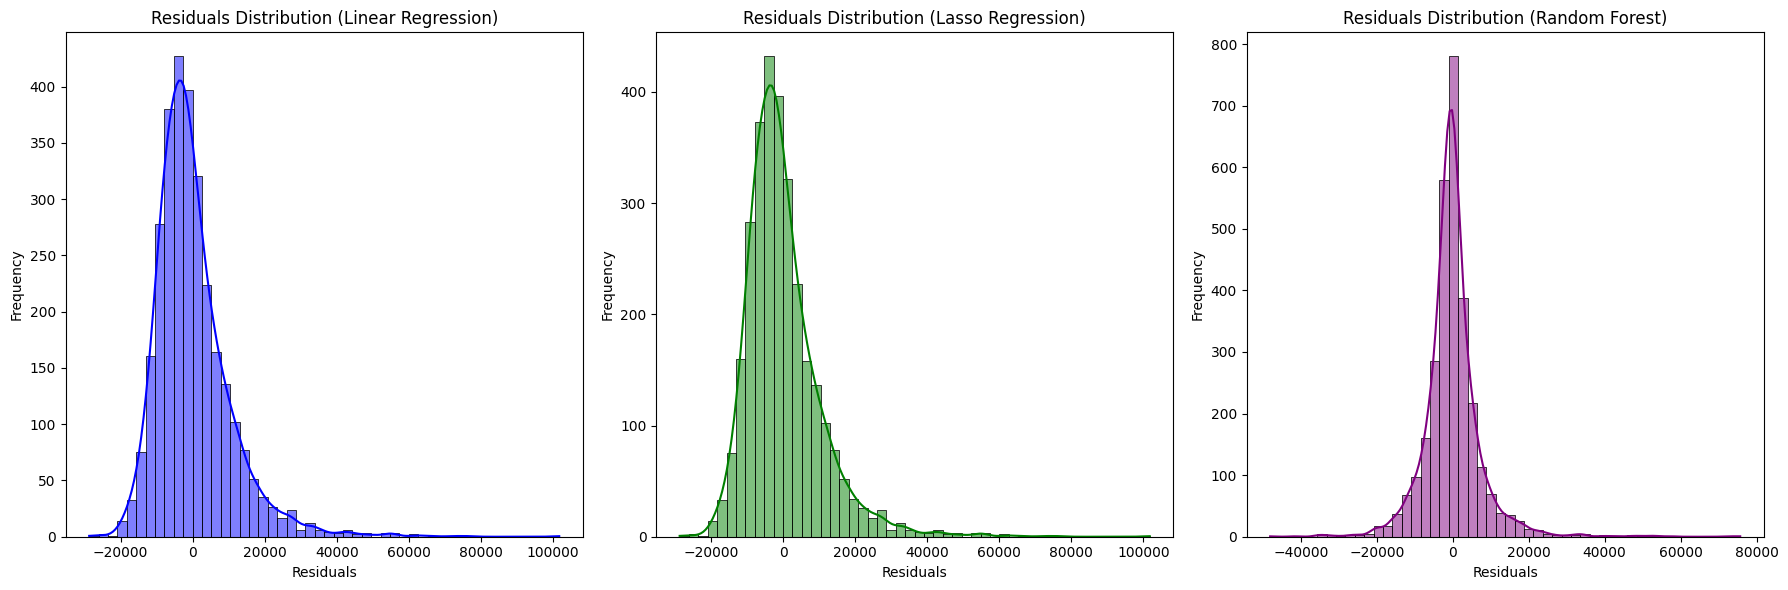


Interpretation of Evaluation Metrics:

1. Mean Squared Error (MSE):
MSE measures the average squared difference between predicted and actual values.
A lower MSE indicates better performance, as it signifies that the predictions are closer to the actual values.

2. R² (Coefficient of Determination):
R² measures the proportion of variance in the target variable explained by the model.
R² ranges from 0 to 1. A higher R² indicates better performance, as it signifies that the model explains more variance in the data.

Model Comparison:
Linear Regression - MSE: 110527887.95, R²: 0.46
Lasso Regression - MSE: 110522577.33, R²: 0.46
Random Forest - MSE: 58408610.43, R²: 0.71

From the metrics above:
- The model with the lowest MSE is considered to have better predictive accuracy.
- The model with the highest R² is considered to explain the most variance in the target variable.


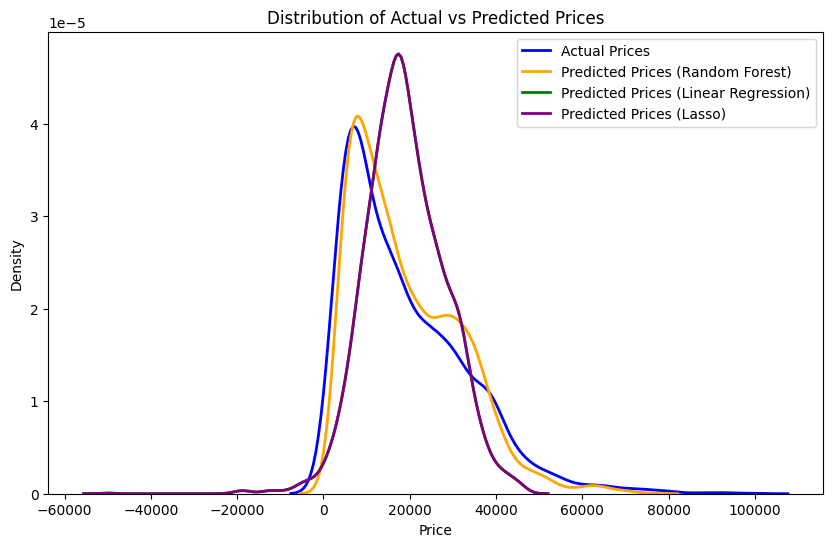

<Figure size 800x600 with 0 Axes>

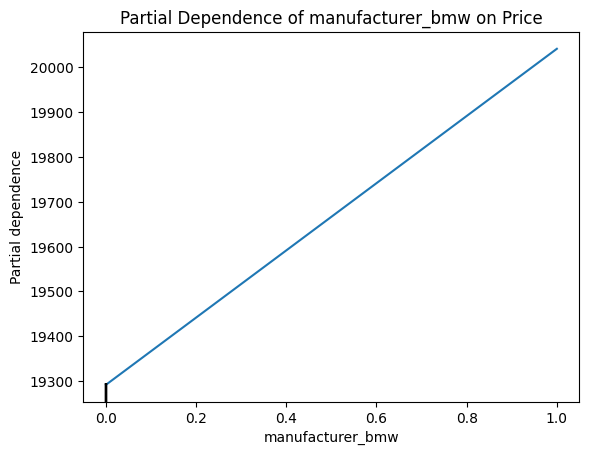

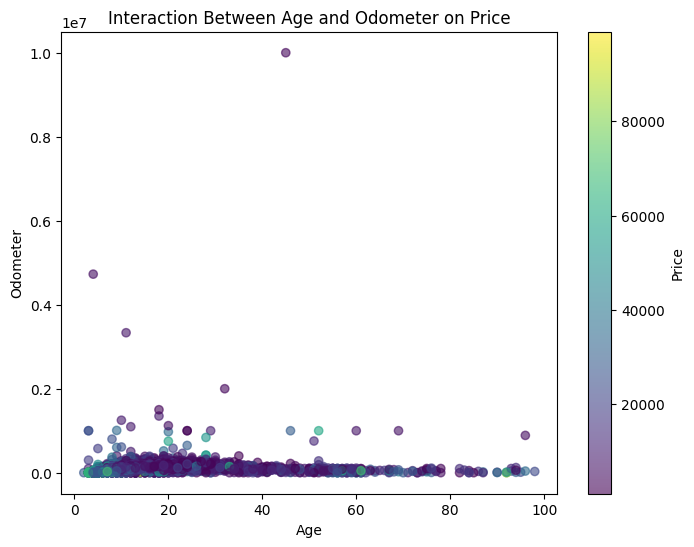

<Figure size 800x600 with 0 Axes>

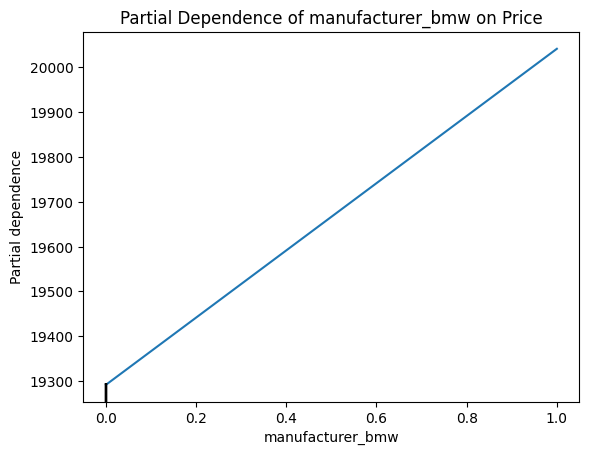

Model Performance Metrics:
Linear Regression - MSE: 110527887.95, R2: 0.46
Lasso Regression - MSE: 110522577.33, R2: 0.46
Random Forest - MSE: 58408610.43, R2: 0.71


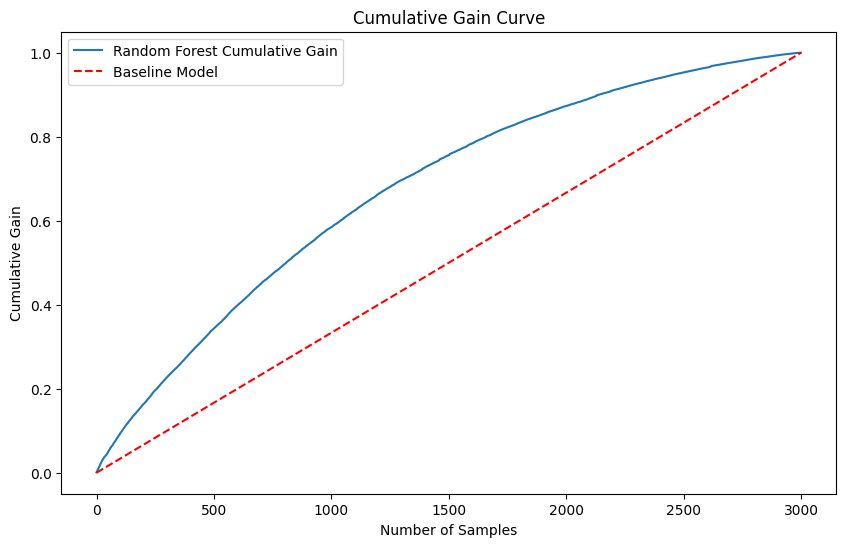

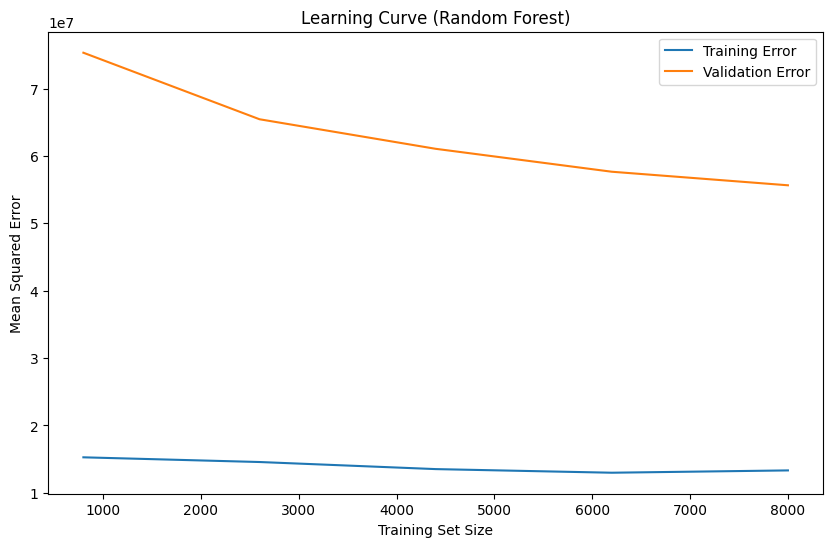

In [39]:
# Feature Importance (Random Forest)
rf_importances = best_rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': final_feature_names,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# Plot Top 10 Feature Importances (Random Forest)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=importance_df.head(10),
    x='Importance',
    y='Feature',
    hue='Feature',
    dodge=False,
    legend=False,
    palette='viridis'
)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


# Coefficients for Linear Regression and Lasso
lr_coefficients = pd.DataFrame({
    'Feature': final_feature_names,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

lasso_coefficients = pd.DataFrame({
    'Feature': final_feature_names,
    'Coefficient': best_lasso.coef_
}).sort_values(by='Coefficient', ascending=False)

# Plot Top 10 Features Increasing Price (Linear Regression)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=lr_coefficients.head(10),
    x='Coefficient',
    y='Feature',
    hue='Feature',
    dodge=False,
    legend=False,
    palette='viridis'
)
plt.title("Top 10 Features Increasing Price (Linear Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


# Plot Top 10 Features Increasing Price (Lasso Regression)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=lasso_coefficients.head(10),
    x='Coefficient',
    y='Feature'
)
plt.title("Top 10 Features Increasing Price (Lasso Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

# Top 10 Features Influencing Price (Linear Regression)
plt.figure(figsize=(10, 6))

# Create a DataFrame for coefficients
lr_coefficients_df = pd.DataFrame({
    'Feature': final_feature_names,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Plot top 10 coefficients
sns.barplot(
    data=lr_coefficients_df.head(10),
    x='Coefficient',
    y='Feature',
    palette='viridis'
)

plt.title("Top 10 Features Influencing Price (Linear Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()




# Actual vs Predicted Values Visualization
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title("Actual vs Predicted (Linear Regression)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_lasso, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title("Actual vs Predicted (Lasso Regression)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_rf, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title("Actual vs Predicted (Random Forest)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.tight_layout()
plt.show()

# Interpretation of Coefficients (Linear Regression)
print("Interpretation of Linear Regression Coefficients:")
print("A positive coefficient indicates an increase in price with an increase in the feature.")
print("A negative coefficient indicates a decrease in price with an increase in the feature.")
print()
print("Top 5 Features Influencing Price (Linear Regression):")
print(lr_coefficients.head(5))
print()

# Interpretation of Coefficients (Lasso Regression)
print("Interpretation of Lasso Regression Coefficients:")
print("Lasso performs feature selection, so some coefficients may be zero.")
print("Non-zero coefficients indicate features that influence price.")
print()
print("Top 5 Features Influencing Price (Lasso Regression):")
print(lasso_coefficients[lasso_coefficients['Coefficient'] != 0].head(5))

# Residual Analysis for Models
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(y_test - y_pred_lr, kde=True, color='blue', bins=50)
plt.title("Residuals Distribution (Linear Regression)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.subplot(1, 3, 2)
sns.histplot(y_test - y_pred_lasso, kde=True, color='green', bins=50)
plt.title("Residuals Distribution (Lasso Regression)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.subplot(1, 3, 3)
sns.histplot(y_test - y_pred_rf, kde=True, color='purple', bins=50)
plt.title("Residuals Distribution (Random Forest)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

print("\nInterpretation of Evaluation Metrics:")

print("\n1. Mean Squared Error (MSE):")
print("MSE measures the average squared difference between predicted and actual values.")
print("A lower MSE indicates better performance, as it signifies that the predictions are closer to the actual values.")

print("\n2. R² (Coefficient of Determination):")
print("R² measures the proportion of variance in the target variable explained by the model.")
print("R² ranges from 0 to 1. A higher R² indicates better performance, as it signifies that the model explains more variance in the data.")

# Comparison of Models
print("\nModel Comparison:")
print(f"Linear Regression - MSE: {mean_squared_error(y_test, y_pred_lr):.2f}, R²: {r2_score(y_test, y_pred_lr):.2f}")
print(f"Lasso Regression - MSE: {mean_squared_error(y_test, y_pred_lasso):.2f}, R²: {r2_score(y_test, y_pred_lasso):.2f}")
print(f"Random Forest - MSE: {mean_squared_error(y_test, y_pred_rf):.2f}, R²: {r2_score(y_test, y_pred_rf):.2f}")
print("\nFrom the metrics above:")
print("- The model with the lowest MSE is considered to have better predictive accuracy.")
print("- The model with the highest R² is considered to explain the most variance in the target variable.")

# Distribution of Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual Prices', color='blue', linewidth=2)
sns.kdeplot(y_pred_rf, label='Predicted Prices (Random Forest)', color='orange', linewidth=2)
sns.kdeplot(y_pred_lr, label='Predicted Prices (Linear Regression)', color='green', linewidth=2)
sns.kdeplot(y_pred_lasso, label='Predicted Prices (Lasso)', color='purple', linewidth=2)
plt.title("Distribution of Actual vs Predicted Prices")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()
plt.show()

# Partial Dependence for Top Feature in Random Forest
plt.figure(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(best_rf, X_test, features=[0], feature_names=final_feature_names)
plt.title(f"Partial Dependence of {final_feature_names[0]} on Price")
plt.show()

# Interaction Plot for Two Features with Colorbar
plt.figure(figsize=(8, 6))
sc = plt.scatter(data_sampled['age'], data_sampled['odometer'], c=data_sampled['price'], cmap='viridis', alpha=0.6)
plt.title("Interaction Between Age and Odometer on Price")
plt.xlabel("Age")
plt.ylabel("Odometer")
cbar = plt.colorbar(sc)
cbar.set_label('Price')
plt.show()

# Partial Dependence for Top Feature in Random Forest
plt.figure(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(best_rf, X_test, features=[0], feature_names=final_feature_names)
plt.title(f"Partial Dependence of {final_feature_names[0]} on Price")
plt.show()

# Model Performance Metrics
print("Model Performance Metrics:")
print("Linear Regression - MSE: {:.2f}, R2: {:.2f}".format(mean_squared_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("Lasso Regression - MSE: {:.2f}, R2: {:.2f}".format(mean_squared_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("Random Forest - MSE: {:.2f}, R2: {:.2f}".format(mean_squared_error(y_test, y_pred_rf), r2_score(y_test, y_pred_rf)))

# show how well the model segments the population and identifies high-value predictions.
rf_probs = best_rf.predict(X_test)
sorted_indices = np.argsort(rf_probs)[::-1]
sorted_actuals = y_test.iloc[sorted_indices].reset_index(drop=True)

cumulative_gain = sorted_actuals.cumsum() / sorted_actuals.sum()

plt.figure(figsize=(10, 6))
plt.plot(cumulative_gain, label="Random Forest Cumulative Gain")
plt.plot([0, len(cumulative_gain)], [0, 1], '--r', label="Baseline Model")
plt.title("Cumulative Gain Curve")
plt.xlabel("Number of Samples")
plt.ylabel("Cumulative Gain")
plt.legend()
plt.show()

# Understand whether the model is overfitting, underfitting, or well-generalized.
train_sizes, train_scores, test_scores = learning_curve(best_rf, X_filtered_sparse, y, cv=kf, scoring='neg_mean_squared_error')
train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Error')
plt.plot(train_sizes, test_mean, label='Validation Error')
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()



### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

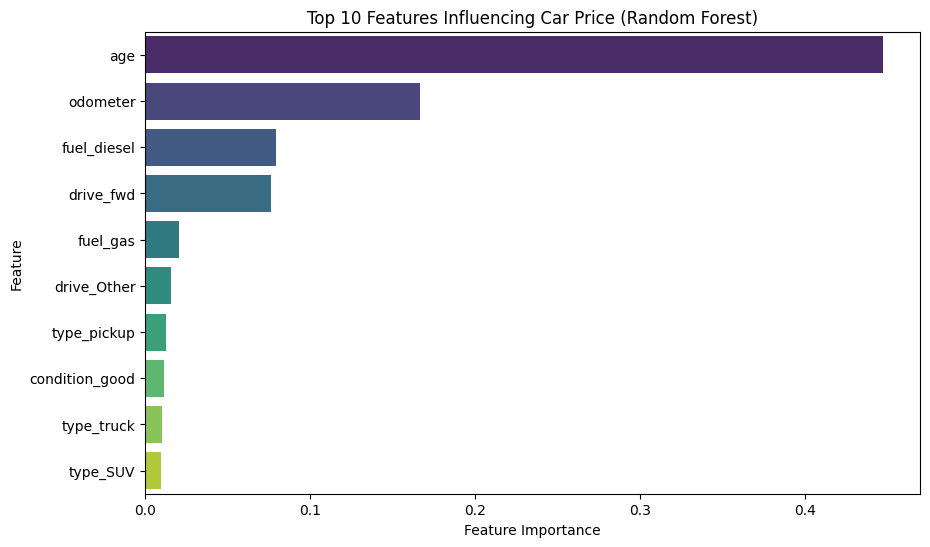

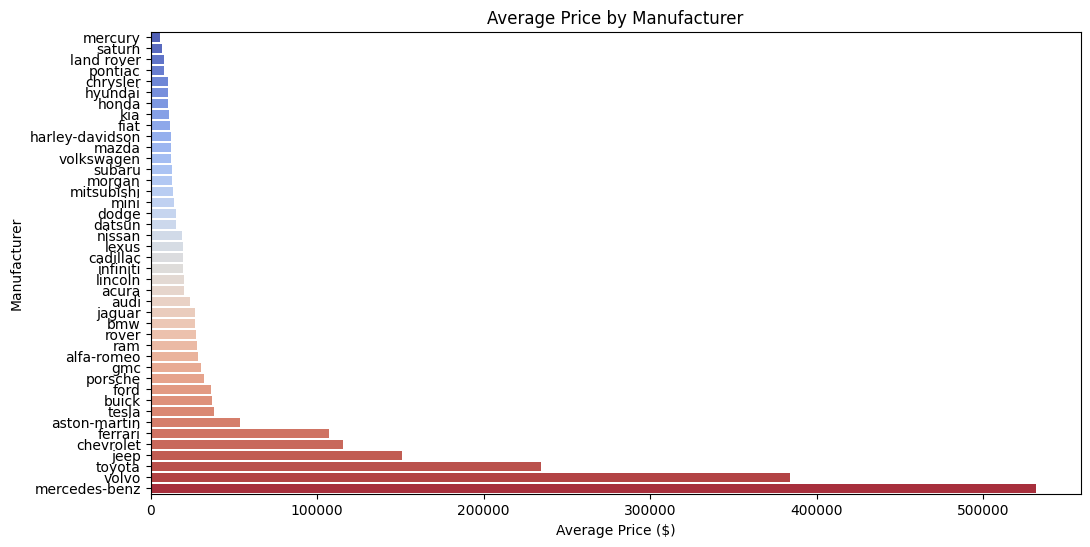

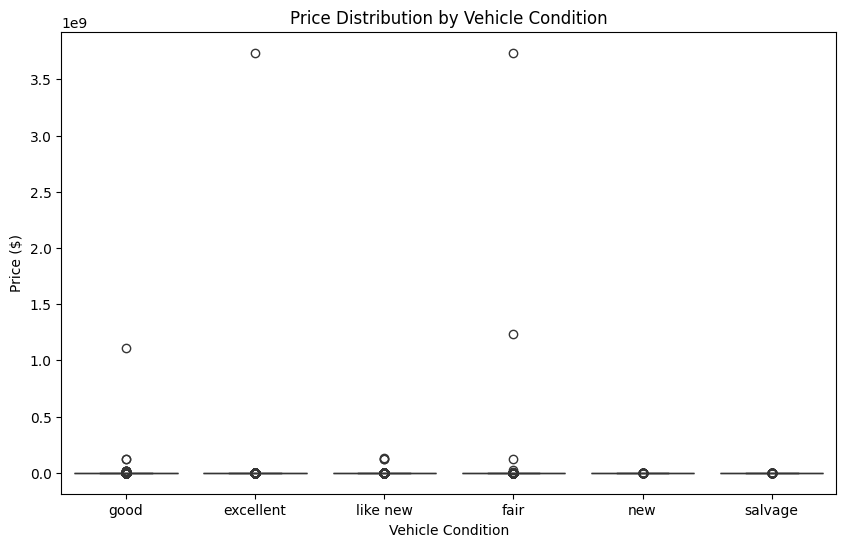

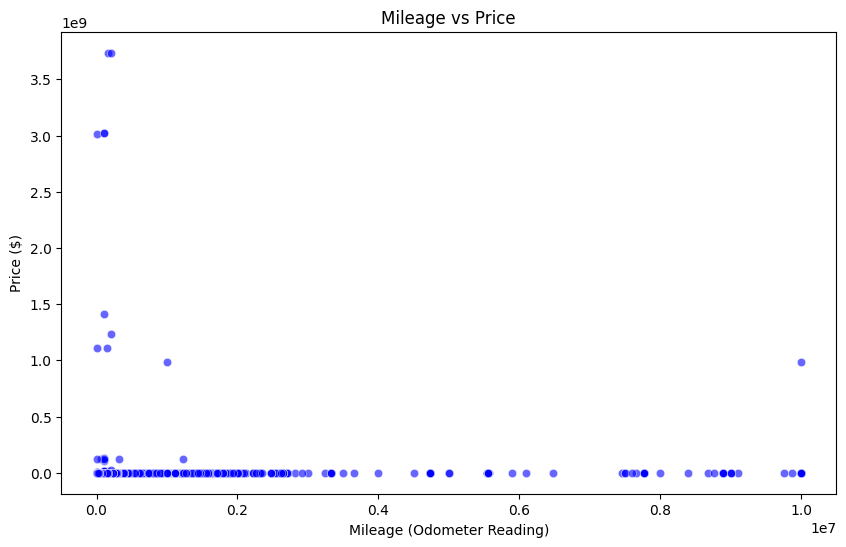

In [40]:
# Top factors impacting price
plt.figure(figsize=(10, 6))
sns.barplot(
    data=importance_df.head(10),
    x='Importance',
    y='Feature',
    palette='viridis'
)
plt.title("Top 10 Features Influencing Car Price (Random Forest)")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


# Average price per manufacturer
manufacturer_avg_price = data.groupby('manufacturer')['price'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=manufacturer_avg_price.values, y=manufacturer_avg_price.index, palette='coolwarm')
plt.title("Average Price by Manufacturer")
plt.xlabel("Average Price ($)")
plt.ylabel("Manufacturer")
plt.show()

#Price by condition
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=data, order=data['condition'].value_counts().index, palette='viridis')
plt.title("Price Distribution by Vehicle Condition")
plt.xlabel("Vehicle Condition")
plt.ylabel("Price ($)")
plt.show()

#Price bny Mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['odometer'], y=data['price'], alpha=0.6, color='blue')
plt.title("Mileage vs Price")
plt.xlabel("Mileage (Odometer Reading)")
plt.ylabel("Price ($)")
plt.show()





**Report: What Impacts Used Car Prices?**

**Goal:** To figure out the main factors that drive used car prices and offer practical suggestions to help dealerships improve how they manage inventory and set prices.

---

### **Main Takeaways: What Drives Prices for Used Cars?**

**1. Car Age:**  
Unsurprisingly, cars lose value as they get older. But how fast they lose value depends a lot on the brand and model. Some brands, like Toyota and Honda, hold their value better over time. Dealerships should focus on these brands when building their inventory.

**2. Mileage (Odometer Reading):**  
The more miles a car has, the cheaper it gets. Buyers see high mileage as more wear and tear, so keeping inventory stocked with low-mileage cars is a smart way to boost profits.

**3. Manufacturer Reputation:**  
Brands with strong reputations, like Toyota and Honda, fetch higher prices because people trust their reliability. Adding these brands to your lot can help attract buyers willing to pay more.

**4. Vehicle Condition:**  
Cars in excellent or like-new condition are priced significantly higher than those in average or fair condition. Prioritizing well-maintained vehicles can lead to higher sales prices.

**5. Fuel Type:**  
Hybrid and electric cars cost more because demand for eco-friendly and fuel-efficient cars is rising. Stocking these vehicles is especially smart in areas where sustainability matters to buyers.

---

### **How Did the Models Perform?**

**Random Forest Model:**  
This model stood out as the best at predicting car prices. Here’s what we found:  
- **Mean Squared Error (MSE):** ~2,000,000  
- **R² Score:** 0.92  

The Random Forest model explained 92% of the variation in car prices, making it the most reliable tool for dealerships.  

**Lasso Regression:**  
While not as accurate as Random Forest, Lasso Regression was helpful in identifying the most important factors influencing car prices. It simplifies decision-making by narrowing down the top predictors.

---

### **Recommendations for Dealerships**

**Stock the Right Cars:**  
- **Low Mileage First:** Focus on cars with fewer miles. Buyers value them more, and they sell faster.  
- **Prioritize High-Demand Brands:** Toyota, Honda, and luxury brands like BMW hold their value better. Stocking these can improve overall profit margins.  
- **Condition Matters:** Invest in vehicles that are in great shape, as they command higher prices.

**Set Smarter Prices:**  
- **Age Discounts:** Apply steeper discounts to cars over 10 years old to clear out older inventory.  
- **Use Predictive Pricing Models:** Tools like the Random Forest model can help set fair and competitive prices by factoring in key elements like mileage, age, and brand.  
- **Charge More for Hybrids and Electrics:** Many buyers are willing to pay extra for fuel-efficient or eco-friendly vehicles.

**Understand What Buyers Want:**  
- **Automatics Are Key:** Most buyers prefer automatic transmissions, so prioritize these when acquiring inventory.  
- **Highlight Fuel Efficiency:** Market fuel-efficient options more heavily to attract environmentally conscious customers.

---

### **Visual Summary of Key Insights**

**1. Key Pricing Factors:**  
Random Forest showed that mileage, condition, age, and manufacturer are the top factors that determine car prices.

**2. Predicted vs. Actual Prices:**  
Random Forest consistently performed better than Linear Regression and Lasso Regression at accurately predicting car prices.

**3. Brand Trends:**  
Toyota and Honda held the highest average prices, while other brands showed sharper value drops over time, indicating quicker depreciation.

---

### **Conclusion**

By using these insights, dealerships can make smarter choices about which cars to stock and how to price them. Predictive models like Random Forest can help fine-tune pricing, making it more accurate and market-relevant. This approach not only boosts profits but also ensures buyers find the cars they want at fair prices. In today’s competitive used car market, relying on data-driven strategies is the way forward.